In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix

In [ ]:
# Loading the data

ROOT_DIR = 'MNIST'

train_data = datasets.MNIST(
    root=ROOT_DIR,
    train=True,
    transform=transforms.ToTensor(),
    target_transform=None,
    download=True
)

test_data = datasets.MNIST(
    root=ROOT_DIR,
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw



In [ ]:
train_data.data.dtype

torch.uint8

In [ ]:
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

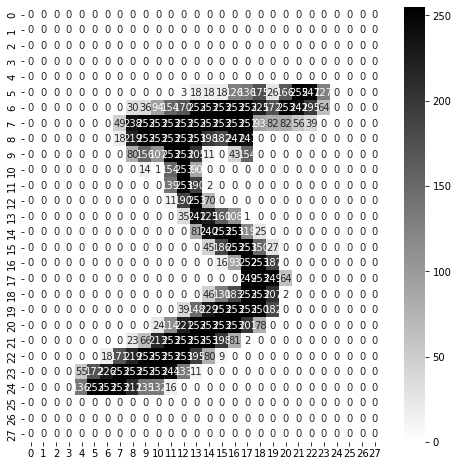

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(train_data.data[0],annot=True, fmt='d', cmap='binary')

In [ ]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [ ]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [ ]:
BATCH = 128

train_data_loader = DataLoader(dataset=train_data,
                               batch_size=BATCH,
                               shuffle=True)
test_data_loader = DataLoader(dataset=test_data,
                              batch_size=BATCH)

In [ ]:
for i in train_data_loader:
  print(i[0].shape)
  print(i[1].shape)
  break

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else 'cpu'
DEVICE

'cpu'

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self, in_, out_):
    super(NeuralNetwork, self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_, 256),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Linear(128, out_)
    )
  
  def forward(self, x):
    return self.layers(x)

In [ ]:
model = NeuralNetwork(784, 10)
model.to(DEVICE)
model

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [ ]:
model.parameters()

<generator object Module.parameters at 0x7f4c36125f50>

In [ ]:
CE_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
EPOCHS=10
loss_ = list()
acc_ = list()

for epoch in range(EPOCHS):
  print(f"Epochs: {epoch + 1}/{EPOCHS}")
  for batch, data in enumerate(train_data_loader):
    x = data[0].to(DEVICE)
    y = data[1].to(DEVICE)

    optimizer.zero_grad()

    y_pred = model(x.reshape(-1, 784))
    loss = CE_loss(y_pred, y)

    loss_.append(loss.item())

    loss.backward()
    optimizer.step()
    accuracy = torch.mean((torch.argmax(y_pred, 1)==y).float()).item()
    acc_.append(accuracy)

    if batch%100==0:
      print(f"   Batch: {batch}, Loss: {loss.item():.4f} Accuracy {accuracy:.4f}")

Epochs: 1/10
   Batch: 0, Loss: 2.3056 Accuracy 0.0781
   Batch: 100, Loss: 0.2982 Accuracy 0.9141
   Batch: 200, Loss: 0.1900 Accuracy 0.9375
   Batch: 300, Loss: 0.2327 Accuracy 0.9219
   Batch: 400, Loss: 0.2378 Accuracy 0.9453
Epochs: 2/10
   Batch: 0, Loss: 0.1559 Accuracy 0.9453
   Batch: 100, Loss: 0.1387 Accuracy 0.9609
   Batch: 200, Loss: 0.0744 Accuracy 0.9766
   Batch: 300, Loss: 0.2029 Accuracy 0.9141
   Batch: 400, Loss: 0.0337 Accuracy 0.9922
Epochs: 3/10
   Batch: 0, Loss: 0.1227 Accuracy 0.9609
   Batch: 100, Loss: 0.1091 Accuracy 0.9766
   Batch: 200, Loss: 0.0595 Accuracy 0.9922
   Batch: 300, Loss: 0.0785 Accuracy 0.9766
   Batch: 400, Loss: 0.1286 Accuracy 0.9609
Epochs: 4/10
   Batch: 0, Loss: 0.0617 Accuracy 0.9844
   Batch: 100, Loss: 0.0424 Accuracy 0.9844
   Batch: 200, Loss: 0.1224 Accuracy 0.9531
   Batch: 300, Loss: 0.1616 Accuracy 0.9688
   Batch: 400, Loss: 0.0273 Accuracy 0.9922
Epochs: 5/10
   Batch: 0, Loss: 0.0648 Accuracy 0.9766
   Batch: 100, Loss: 

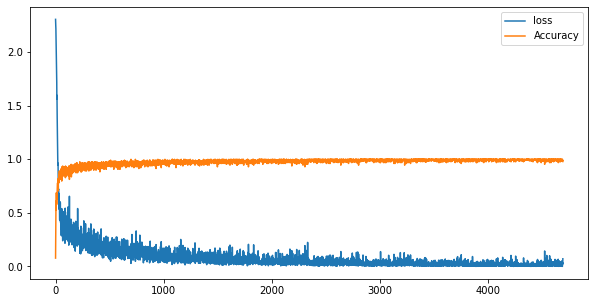

In [ ]:
import pandas as pd
pd.DataFrame(data={'loss': loss_, "Accuracy": acc_}).plot(figsize=(10,5))

In [ ]:
# testing over the test data

test_loss = 0
test_acc = 0

with torch.no_grad():
    for batch, data in enumerate(test_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)        
        
        y_pred = model(x.reshape(-1, 784))
        loss = CE_loss(y_pred, y)
        
        test_loss += loss.item()
        test_acc += torch.mean((torch.argmax(y_pred, 1) == y).float()).item()
        batch+=1

In [ ]:
print(f"test loss: {test_loss/batch:.4f}, test accuracy: {test_acc/batch:.4f}")

test loss: 0.0735, test accuracy: 0.9801


In [ ]:
print(f"test loss: {batch:.4f}, test accuracy: {batch:.4f}")

test loss: 78.0000, test accuracy: 78.0000


In [ ]:
pred = np.array([])
target = np.array([])

with torch.no_grad():
    for batch, data in enumerate(test_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)        
        
        y_pred = model(x.reshape(-1, 784))
        loss = CE_loss(y_pred, y)
        
        pred = np.concatenate((pred, torch.argmax(y_pred, 1).cpu().numpy()))
        target = np.concatenate((target, y.cpu().numpy()))        

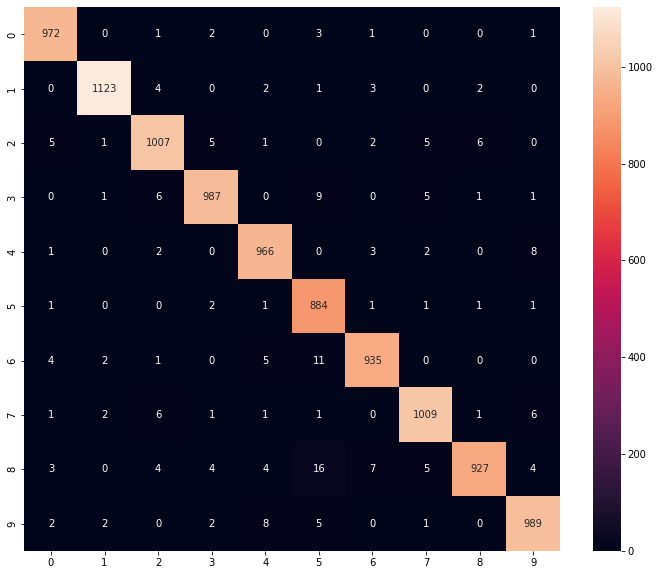

In [ ]:
cm = confusion_matrix(target, pred)


plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d')